In [28]:
import atd2022
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas import datetime

/var/folders/ps/25j8kg513zg1zlwxxrcfl85m0000gn/T/ipykernel_9557/1811468217.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [29]:
data = atd2022.io.read_csv()

In [30]:
from dataclasses import dataclass
from typing import Optional
import my_mod as util
import pandas as pd
import gc
import numpy as np
#from my_mod import CNN_ForecastNet
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

In [31]:
from arimaForecaster import arimaForecaster

In [33]:
data2 = data.reset_index(drop=True)

In [ ]:

for region in data2:
    temp_region = data2[region]
    #print(temp_region
      
   # y = temp_region.values 
    train, test = train_test_split(y, train_size=150)

    history = [x for x in train]
    predictions = list()

    full_df=data
    name_lst = [] #simply just extracting all regions from the data set
    model_list=[]


   # y = temp_region.values 
   # train, test = train_test_split(y, train_size=150)
    for i in range(0,full_df.shape[1],20):
        name = full_df.columns[i][0]
        name_lst.append(name)
        print(name_lst)
            
       # model_list=[]
       
        for region_name in name_lst:
            region_df = full_df[region_name]
            #print(region_df)
        #x, y_train = util.getMultiDXY(df=region_df, n_lags=2)
        #n_features = 20
        #x_train=x.reshape((x.shape[0], x.shape[1], n_features))  # need to print the reshaping not sure what exactly doing and why has 2 cols.
        
            history = [k for k in train] # might be slightly incorreect this how the data was just played with above
            model = ARIMA(history, order =(5,1,0)) # x in this case should be the history 
            model_list.append(model) # i dont understand what this is doing adding each regions or cols model to the model list 
            model_fit = model.fit()
            output = model_fit.forecast(4, alpha = 0.01) #can be adjusted 
  
            #generate all 4 of the next preds? and then append to 
            yhat_1 = output[0] 
        
            print(yhat_1)

In [51]:
#for region in data2:
   # temp_region = data2[region]
    #print(temp_region
      
   # y = temp_region.values 
  #  train, test = train_test_split(y, train_size=150)

 #   history = [x for x in train]
  #  predictions = list()
full_df=data
name_lst = [] #simply just extracting all regions from the data set
model_list=[]


   # y = temp_region.values 
   # train, test = train_test_split(y, train_size=150)
for i in range(0,full_df.shape[1],20):
    name = full_df.columns[i][0]
    name_lst.append(name)
   # print(name_lst)
            
       # model_list=[]


    # y = temp_region.values 
  #  train, test = train_test_split(y, train_size=150)

 #   history = [x for x in train]
  #  predictions = list()
       
    for region_name in name_lst:

        region_df = full_df[region_name]
       # print(region_df)

        y = region_df.values  #i need to 

        train, test = train_test_split(y, train_size=150)
       # history = [x for x in train]

        print(train)
            #print(region_df)
        #x, y_train = util.getMultiDXY(df=region_df, n_lags=2)
        #n_features = 20
        #x_train=x.reshape((x.shape[0], x.shape[1], n_features))  # need to print the reshaping not sure what exactly doing and why has 2 cols.
        
        history = [k for k in train] # might be slightly incorreect this how the data was just played with above
        model = ARIMA(history, order =(5,1,0)) # x in this case should be the history 
        model_list.append(model) # i dont understand what this is doing adding each regions or cols model to the model list 
        model_fit = model.fit()
        output = model_fit.forecast(4, alpha = 0.01) #can be adjusted 
  
            #generate all 4 of the next preds? and then append to 
        yhat_1 = output[0] 
        
       # print(yhat_1)

[[20  5 22 ...  0  0  0]
 [ 4  1  0 ...  0  0  0]
 [22  4  4 ...  0  2  0]
 ...
 [ 3  3  4 ...  0  1  0]
 [ 9  3  9 ...  0  1  0]
 [ 1  1  0 ...  0  0  0]]


ValueError: SARIMAX models require univariate `endog`. Got shape (150, 20).

In [52]:
class arimaForecaster:
    
#fit is where the training is occurring not just fitting data 
    def fit(self, data: pd.DataFrame(), past_covariates=None) -> "arimaForecaster": # dont htink that I would need past covs
        full_df=data 
        name_lst = [] #simply just extracting all regions from the data set
        for i in range(0,full_df.shape[1],20):
            name = full_df.columns[i][0]
            name_lst.append(name)
            
        self.model_list=[]
       
        for region_name in name_lst:
            
            
            region_df = full_df[region_name]
           
            # i think that ^ this is all i need to can't i just use all the data for training of the data
            
            x, y_train = util.getMultiDXY(df=region_df, n_lags=2)
            n_features = 20
            x_train=x.reshape((x.shape[0], x.shape[1], n_features))  # need to print the reshaping not sure what exactly doing and why has 2 cols.
            
            #up to this is just splitting the data and making is fit for 1d cnn
            
            #self.model = CNN_ForecastNet().to(device)  # save it for later
            history = [x for x in x_train] # might be slightly incorreect this how the data was just played with above
            #might need to be the entire training set
            self.model = ARIMA(history, order =(5,1,0)) # x in this case should be the history 

            
            self.model_list.append(self.model) # i dont understand what this is doing adding each regions or cols model to the model list 
        return self

    def predict(self, x: pd.Index) -> pd.DataFrame:

        train_df = self.training_df
        predictions = self.generate_pred(full_df=train_df)
        predictions[predictions<0]=0    
        return predictions

    def generate_pred(self, full_df:pd.DataFrame):
        model_list = self.model_list

        name_lst = []
        for i in range(0,full_df.shape[1],20):
            name = full_df.columns[i][0]
            name_lst.append(name)
        current_iter=0
        pred_lst=[]
        for region_name in name_lst:
            current_model = model_list[current_iter]
            region_df = full_df[region_name]
            pred = util.pre_trained_region_pred(model=current_model, region_df=region_df, n_lags=2)
            pred = np.round(pred)

            col_lst=[]
            for i in range(1,21):
                col=(region_name, i)
                col_lst.append(col)
        
            cols=pd.MultiIndex.from_tuples(col_lst)
            pred_lst.append(pd.DataFrame(data=pred, columns=cols))
    
        final = pd.concat(pred_lst, axis=1)
        return final

    

In [ ]:
data.fit()

AttributeError: 'DataFrame' object has no attribute 'fit'

In [107]:

from http.client import parse_headers


temp_ls = []
model_lst = []

for region in data2:
    temp_region = data2[region]
    #print(temp_region
      
    y = temp_region.values 
    train, test = train_test_split(y, train_size=150)

    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    
    #okay so this is just testing on the test data set, i guess the model requires no training or anything as is stats model 
    for t in range(len(test)):
        model = ARIMA(history, order=(5,2,0))
        model_lst.append(model)
        model_fit = model.fit()
        output = model_fit.forecast(4, alpha = 0.01) #can be adjusted 
  
        #generate all 4 of the next preds? and then append to 
        yhat_1 = output[0] 
        yhat_2 = output[1] # does doing this cause the error?
        yhat_3 = output[2]
        yhat_4 = output[3]

        if yhat_1 < 0: 
            yhat_1 = 0
        
        elif yhat_2 < 0: 
            yhat_2 = 0
            
        elif yhat_3 < 0: 
            yhat_3 = 0
            
        elif yhat_4 < 0: 
            yhat_4 = 0 

        predictions.append(yhat_1) # this is just the predicted vals
        predictions.append(yhat_2)
        predictions.append(yhat_3)
        predictions.append(yhat_4)
        
        #print('pred 1=%f, pred 2=%f, pred 3=%f,pred 4=%f' % (yhat_1, yhat_2, yhat_3, yhat_4))

        
#these preds need to be just outputted in the proper columns format
        
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat_1, obs))

        model_list = model_lst

        name_lst = []
        for i in range(0,full_df.shape[1],20):
            name = full_df.columns[i][0]
            name_lst.append(name)
        current_iter=0
        pred_lst=[]
        for region_name in name_lst:
            current_model = model_list[current_iter]
            region_df = full_df[region_name]
            #pred = util.pre_trained_region_pred(model=current_model, region_df=region_df, n_lags=2)
            model_fit = current_model.fit()
            output = model_fit.forecast(4, alpha = 0.01) #can be adjusted 
  
            #generate all 4 of the next preds? and then append to 
            yhat_1 = output[0] 
            yhat_2 = output[1] # does doing this cause the error?
            yhat_3 = output[2]
            yhat_4 = output[3]

            if yhat_1 < 0: 
                yhat_1 = 0
        
            elif yhat_2 < 0: 
                yhat_2 = 0
            
            elif yhat_3 < 0: 
                yhat_3 = 0
            
            elif yhat_4 < 0: 
                yhat_4 = 0      

            
            pred1 = np.round(yhat_1)
            pred2 = np.round(yhat_2)
            pred3 = np.round(yhat_3)
            pred4 = np.round(yhat_4)

            preds = [pred1, pred2, pred3, pred4]

            preds_np = np.array(preds)

            col_lst=[]
           # preds_lst = []
            for i in range(1,21):
                col=(region_name, i)
                #preds_lst.append(pd.DataFrame(data=preds, columns=i))
                col_lst.append(col)

        
            cols=pd.MultiIndex.from_tuples(col_lst)

            steve = pd.DataFrame(index=np.arange(4), columns=cols)
            
            # then here insert np array 
            #steve = pd.DataFrame(index=preds, columns=cols)
            #steve["AA"] = preds

            #for region in steve:
                #print(region)

                
                #for col in region:
                   # print(col)
                #    col = preds 


            print(steve)
            my_df = pd.DataFrame(index=np.arange(1), columns=np.arange(1))
            
          #  my_df.insert(1, 1, preds[0])
            #my_df.insert(2, 1, preds[1])
            #my_df['AA'] = preds[0]
            #print(my_df)
            
            #steve.insert(1, 0, preds[0])
           # steve.append(preds)
            #steve.insert(2, 1, preds[1])
           # steve.insert(3, 1, preds[2])
           # steve.insert(4, 1, preds[3])

            #df2 = pd.DataFrame({"1":[1, 2, 3]})

           # steve.append(df2)


            #print(steve)


           # pred_lst.append(pd.DataFrame(data=preds, columns=cols))
    
        final = pd.concat(pred_lst, axis=1)
        print(final)


    AA                                                                        \
    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                            
    16   17   18   19   20  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
    AC                                                                        \
    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN  NaN  NaN  NaN  Na

ValueError: No objects to concatenate

In [14]:
data.head()

Region                AA                                 ...   ZI              \
Event                 01 02  03  04 05   06 07 08 09 10  ...   11  12  13  14   
2013-12-30/2014-01-05  0  0   0   6  0    0  0  0  0  0  ...   97  25  15   1   
2014-01-06/2014-01-12  2  0   0  11  0    1  0  0  0  0  ...  204  64  29  41   
2014-01-13/2014-01-19  0  1   3   7  1    0  0  0  0  0  ...  164  49  20   8   
2014-01-20/2014-01-26  0  1   0   4  0    0  0  2  0  0  ...   58  26  10   1   
2014-01-27/2014-02-02  6  1  59   3  0  103  0  4  0  0  ...  227  67  42  45   

Region                                          
Event                  15  16   17  18   19 20  
2013-12-30/2014-01-05  13   6   90  25   51  1  
2014-01-06/2014-01-12  16  22  174  56  118  0  
2014-01-13/2014-01-19   0  34   91  20   63  0  
2014-01-20/2014-01-26   3   8   47  16   22  0  
2014-01-27/2014-02-02   0  19  169  47   69  0  

[5 rows x 5200 columns]

In [15]:
data.index

PeriodIndex(['2013-12-30/2014-01-05', '2014-01-06/2014-01-12',
             '2014-01-13/2014-01-19', '2014-01-20/2014-01-26',
             '2014-01-27/2014-02-02', '2014-02-03/2014-02-09',
             '2014-02-10/2014-02-16', '2014-02-17/2014-02-23',
             '2014-02-24/2014-03-02', '2014-03-03/2014-03-09',
             ...
             '2017-12-04/2017-12-10', '2017-12-11/2017-12-17',
             '2017-12-18/2017-12-24', '2017-12-25/2017-12-31',
             '2018-01-01/2018-01-07', '2018-01-08/2018-01-14',
             '2018-01-15/2018-01-21', '2018-01-22/2018-01-28',
             '2018-01-29/2018-02-04', '2018-02-05/2018-02-11'],
            dtype='period[W-SUN]', length=215)

In [14]:
data2 = data.reset_index(drop=True)

In [19]:
region_AA = data2["AA"]

In [26]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

temp_ls = []

for region in data2:
    temp_region = data2[region]
    #print(temp_region
      
    y = temp_region.values 
    train, test = train_test_split(y, train_size=150)
    # need to figure out what type these are

    print(type(train))
    

    history = [x for x in train]
    print(type(history))
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        if yhat < 0: 
            yhat = 0
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
       # print('predicted=%f, expected=%f' % (yhat, obs))
	   # print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
   # rmse = sqrt(mean_squared_error(test,predictions))
   # print('Test RMSE: %.3f' % rmse)
  #  pyplot.plot(test)
 #   pyplot.plot(predictions, color='red')
 #   pyplot.show()
    

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'list'>


KeyboardInterrupt: 

In [58]:
region_AA

Event,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20
0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,3,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,4,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0
4,6,1,59,3,0,103,0,4,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,13,9,20,85,4,2,0,2,8,0,0,0,0,0,0,1,8,0,0,0
211,14,5,8,10,1,0,0,1,0,1,0,1,0,0,0,0,3,0,2,0
212,5,2,0,23,3,2,5,1,0,0,2,0,0,0,0,3,4,0,4,0
213,3,2,7,37,6,10,4,7,0,1,1,1,0,0,0,0,0,0,0,0


In [59]:
region_AA["01"]

0       0
1       2
2       0
3       0
4       6
       ..
210    13
211    14
212     5
213     3
214     7
Name: 01, Length: 215, dtype: int64

In [60]:
print(len(region_AA["01"]))

215


In [20]:
type(region_AA["01"])

pandas.core.series.Series

In [21]:
event1_region1 = region_AA["01"]

In [22]:
event1_region1 

0       0
1       2
2       0
3       0
4       6
       ..
210    13
211    14
212     5
213     3
214     7
Name: 01, Length: 215, dtype: int64

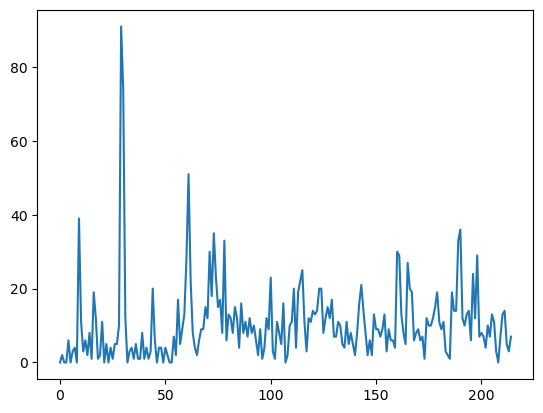

In [23]:
plt.plot(event1_region1)

                               SARIMAX Results                                
Dep. Variable:                     01   No. Observations:                  215
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -839.904
Date:                Fri, 19 Aug 2022   AIC                           1691.809
Time:                        16:54:25   BIC                           1711.976
Sample:                             0   HQIC                          1699.959
                                - 215                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9973      0.053    -18.758      0.000      -1.101      -0.893
ar.L2         -0.9308      0.061    -15.248      0.000      -1.050      -0.811
ar.L3         -0.7459      0.090     -8.260      0.0

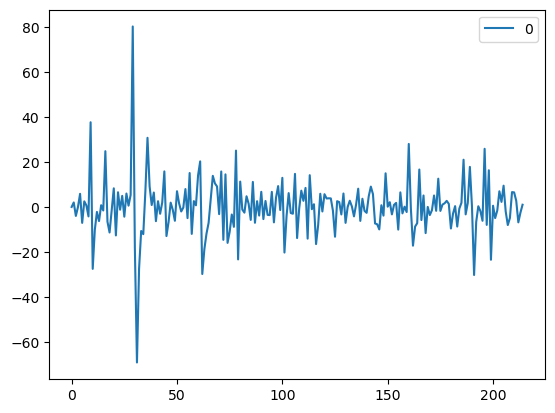

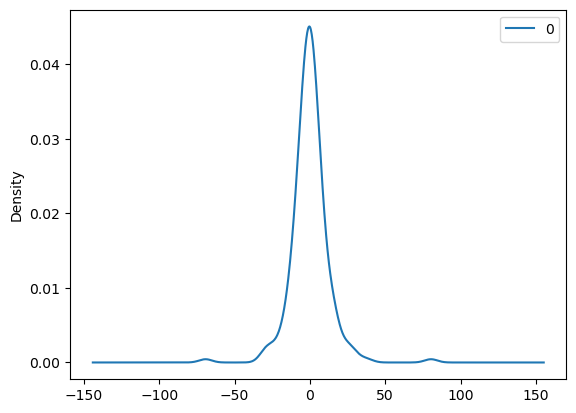

                0
count  215.000000
mean    -0.019262
std     12.410441
min    -69.213207
25%     -5.791580
50%      0.000000
75%      5.216406
max     80.322493


In [24]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

model = ARIMA(event1_region1, order=(5,2,0))

model_fit = model.fit()

print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<class 'list'>
predicted=14.624058, expected=1.000000
predicted=10.479307, expected=1.000000
predicted=6.298252, expected=1.000000
predicted=4.442840, expected=39.000000
predicted=10.513714, expected=6.000000
predicted=5.893066, expected=6.000000
predicted=8.838440, expected=2.000000
predicted=8.526738, expected=1.000000
predicted=12.161187, expected=12.000000
predicted=10.283272, expected=7.000000
predicted=5.451011, expected=2.000000
predicted=4.449503, expected=1.000000
predicted=3.826021, expected=12.000000
predicted=7.187756, expected=11.000000
predicted=7.250437, expected=22.000000
predicted=9.290216, expected=11.000000
predicted=8.691417, expected=9.000000
predicted=11.299185, expected=2.000000
predicted=10.602214, expected=11.000000
predicted=12.503286, expected=11.000000
predicted=10.733583, expected=10.000000
predicted=8.931313, expected=2.000000
predicted=6.441937, expected=0.000000
predicted=6.376414, expected=10.000000
predicted=8.138231, expected=36.000000
predicted=13.20

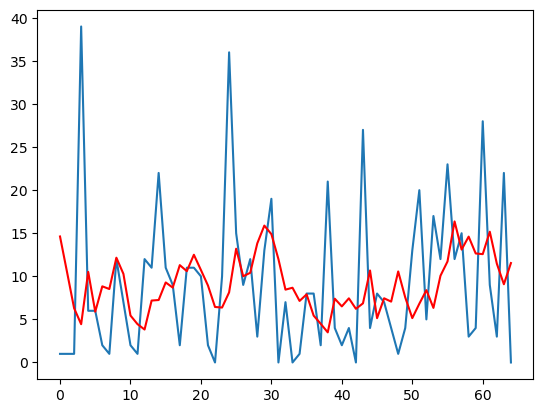

In [25]:
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

y = event1_region1.values 
train, test = train_test_split(y, train_size=150)


history = [x for x in train]
print(type(history))
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	if yhat < 0:
		yhat = 0 
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

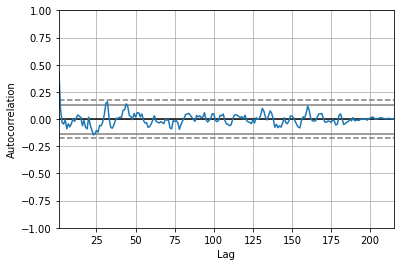

In [71]:
autocorrelation_plot(event1_region1)

/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/gheyrich/opt/anaconda3/envs/atd2022/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


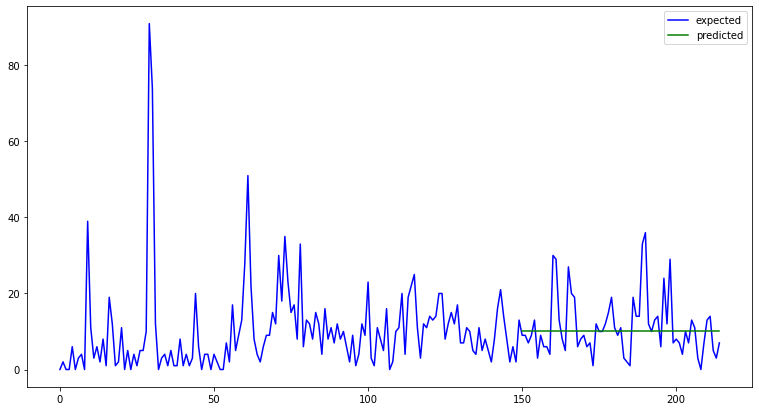

In [70]:
from sklearn.model_selection import train_test_split
import pmdarima as pm
from pmdarima import auto_arima


y = event1_region1.values 
train, test = train_test_split(y, train_size=150)


# Fit model
model = pm.auto_arima(train, seasonal=True, m=12)

forecasts = model.predict(test.shape[0])  

x = np.arange(y.shape[0])
plt.figure(figsize = (13,7))
plt.plot(x, y, c='blue' , label = 'expected')
plt.plot(x[150:], forecasts, c='green' , label = 'predicted')
plt.legend()
plt.show()